In [1]:
from shapely.geometry import Point, Polygon
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

%run ../python_files/feature_selection_blocks

In [2]:
# import data
puds = pd.read_csv('../data/final_datasets/master_puds_blocks.csv')

In [3]:
# feature engineering
puds = create_demo_col(puds)
minipuds = agg_puds(puds)

In [4]:
# set up dependent var
outcome = 'eviction-rate'

In [5]:
# does number of PUDs in a census tract work as a predictor for eviction rate?

# set up single linear regression
x_cols = minipuds['pud_count']

X = minipuds['pud_count'].values

y = minipuds[outcome]

# fit model
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )
result = model.fit()
labels = ['intercept'] + ['pud_count']
result.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction-rate   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6723
Date:                Mon, 02 Dec 2019   Prob (F-statistic):              0.413
Time:                        16:14:45   Log-Likelihood:                -958.67
No. Observations:                 367   AIC:                             1921.
Df Residuals:                     365   BIC:                             1929.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4613      0.187     13.186      0.000       2.094       2.828
pud_count      0.0835      0.102      0.820      0.413      -0.117       0.284
==============================================================================
Omnibus:                      238.751   Durbin-Watson:                   1.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2376.581
Skew:                           2.659   Prob(JB):                         0.00
Kurtosis:                      14.275   Cond. No.                         2.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on Adj. R-squared of -0.001, pud_count does **not** explain any of the variance in eviction-rate

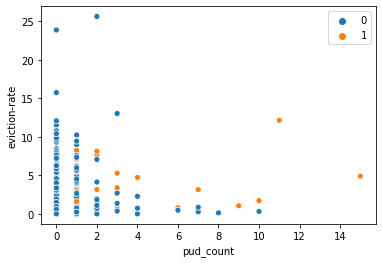

In [27]:
sns.scatterplot(x = minipuds['pud_count'], 
                y = minipuds['eviction-rate'], 
                hue = [0 if el == 0 else 1 for el in minipuds['% Affordable Units']]);

In [7]:
# can you predict eviction rate based on ward?

# set up single linear regression
encoder = OneHotEncoder(handle_unknown="error", drop='first')
X_cat = encoder.fit_transform(np.array(minipuds['ward']).reshape(-1, 1)).toarray()

X = X_cat
y = minipuds[outcome]

# fit model
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )
result = model.fit()
labels = ['intercept'] + [("ward_"+str(i)) for i in range(0,7)]
result.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction-rate   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     37.70
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.73e-39
Time:                        16:14:46   Log-Likelihood:                -857.88
No. Observations:                 367   AIC:                             1732.
Df Residuals:                     359   BIC:                             1763.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4782      0.382      3.870      0.000       0.727       2.229
ward_0        -0.7764      0.512     -1.515      0.131      -1.784       0.231
ward_1        -1.0238      0.534     -1.916      0.056      -2.074       0.027
ward_2         1.0033      0.531      1.888      0.060      -0.042       2.048
ward_3         1.2599      0.534      2.358      0.019       0.209       2.311
ward_4        -0.3560      0.524     -0.680      0.497      -1.386       0.674
ward_5         4.5480      0.537      8.467      0.000       3.492       5.604
ward_6         5.2951      0.579      9.153      0.000       4.157       6.433
==============================================================================
Omnibus:                      318.045   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9434.005
Skew:                           3.467   Prob(JB):                         0.00
Kurtosis:                      26.850   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# what about looking at more variables?

# set up multiple linear regression
x_cols = ['pct-non-white','poverty-rate', 'pct-renter-occupied','pud_count']

minitest = minipuds[x_cols]

X = minitest.values

encoder = OneHotEncoder(handle_unknown="error", drop='first')
X_cat = encoder.fit_transform(np.array(minipuds['ward']).reshape(-1, 1)).toarray()

X = np.concatenate((X, X_cat), axis = 1)
y = minipuds[outcome]

# fit model01
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )
result = model.fit()
labels = ['intercept'] + x_cols + [("ward_"+str(i)) for i in range(0,7)]
result.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction-rate   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     27.84
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           9.83e-42
Time:                        16:14:46   Log-Likelihood:                -844.87
No. Observations:                 367   AIC:                             1714.
Df Residuals:                     355   BIC:                             1761.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept              -0.5232      0.661     -0.791      0.429      -1.824       0.778
pct-non-white           0.0320      0.009      3.708      0.000       0.015       0.049
poverty-rate            0.0080      0.014      0.578      0.563      -0.019       0.035
pct-renter-occupied     0.0035      0.007      0.496      0.620      -0.010       0.018
pud_count               0.1413      0.080      1.776      0.077      -0.015       0.298
ward_0                 -0.3365      0.519     -0.648      0.517      -1.357       0.684
ward_1                 -0.0703      0.564     -0.125      0.901      -1.179       1.038
ward_2                  0.1804      0.596      0.303      0.762      -0.991       1.352
ward_3                  0.2864      0.580      0.494      0.622      -0.854       1.426
ward_4                 -0.1715      0.519     -0.331      0.741      -1.192       0.849
ward_5                  2.9595      0.647      4.574      0.000       1.687       4.232
ward_6                  3.5112      0.703      4.993      0.000       2.128       4.894
==============================================================================
Omnibus:                      329.444   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11371.207
Skew:                           3.601   Prob(JB):                         0.00
Kurtosis:                      29.301   Cond. No.                         825.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# set up single linear regression
x_cols = 'pct-non-white'

X = minipuds[x_cols].values
y = minipuds[outcome]

# # fit model03
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )
result = model.fit()
labels = ['intercept'] + [x_cols]
result.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction-rate   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     203.5
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           5.33e-37
Time:                        16:14:46   Log-Likelihood:                -877.71
No. Observations:                 367   AIC:                             1759.
Df Residuals:                     365   BIC:                             1767.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -1.4173      0.309     -4.590      0.000      -2.024      -0.810
pct-non-white     0.0633      0.004     14.264      0.000       0.055       0.072
==============================================================================
Omnibus:                      276.509   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5676.690
Skew:                           2.931   Prob(JB):                         0.00
Kurtosis:                      21.354   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# set up single linear regression
x_cols = 'poverty-rate'

X = minipuds[x_cols].values
y = minipuds[outcome]

# # fit model04
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )
result = model.fit()
labels = ['intercept'] + [x_cols]
result.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction-rate   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     108.7
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.85e-22
Time:                        16:14:46   Log-Likelihood:                -911.15
No. Observations:                 367   AIC:                             1826.
Df Residuals:                     365   BIC:                             1834.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        1.2021      0.197      6.090      0.000       0.814       1.590
poverty-rate     0.1097      0.011     10.428      0.000       0.089       0.130
==============================================================================
Omnibus:                      275.951   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.857
Skew:                           2.980   Prob(JB):                         0.00
Kurtosis:                      20.006   Cond. No.                         24.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# set up single linear regression
x_cols = 'pct-renter-occupied'

X = minipuds[x_cols].values
y = minipuds[outcome]

# # fit model05
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )
result = model.fit()
labels = ['intercept'] + [x_cols]
result.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction-rate   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     16.75
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           5.25e-05
Time:                        16:14:46   Log-Likelihood:                -950.77
No. Observations:                 367   AIC:                             1906.
Df Residuals:                     365   BIC:                             1913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               0.8106      0.450      1.799      0.073      -0.075       1.696
pct-renter-occupied     0.0310      0.008      4.093      0.000       0.016       0.046
==============================================================================
Omnibus:                      261.285   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3499.762
Skew:                           2.878   Prob(JB):                         0.00
Kurtosis:                      16.991   Cond. No.                         159.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# looking at top 2 predictor cols

# set up multiple linear regression
x_cols = ['pct-non-white','poverty-rate']

minitest = minipuds[x_cols]

X = minitest.values
y = minipuds[outcome]

# fit model01
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )
result = model.fit()
labels = ['intercept'] + x_cols
result.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction-rate   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     110.1
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           4.05e-38
Time:                        16:18:52   Log-Likelihood:                -872.19
No. Observations:                 367   AIC:                             1750.
Df Residuals:                     364   BIC:                             1762.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -1.1835      0.313     -3.786      0.000      -1.798      -0.569
pct-non-white     0.0518      0.006      9.278      0.000       0.041       0.063
poverty-rate      0.0402      0.012      3.332      0.001       0.016       0.064
==============================================================================
Omnibus:                      289.210   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6611.652
Skew:                           3.092   Prob(JB):                         0.00
Kurtosis:                      22.853   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Graveyard

In [13]:
# set up co-linearity check

y_vif = minipuds[outcome]
## remove Passenger from predictor list
## prepare data for the linear model

X_vif = minipuds[x_cols]
## add intercept term
X_vif = sm.add_constant(X_vif.values)
## fit model
model_vif = sm.OLS(y_vif, X_vif, hasconst=True)
result_vif = model_vif.fit()
## check the r2-score
result_vif.summary()
## calculate vif score directly from r2-score
passenger_vif = 1/(1 - result_vif.rsquared)
passenger_vif

1.6049175123874027

In [14]:
## standard scaling 
# for col in x_cols:
#     ## Here we don't have to do this but still it is a good practice
#     if (type(minipuds[col]) == int) | (type(minipuds[col]) == float):
#         minipuds[col] = (minipuds[col] - minipuds[col].mean())/minipuds[col].std()

In [15]:
test['ward'] = [int(el[-1]) for el in minipuds.ward]

NameError: name 'test' is not defined